/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.6999 - loss: 0.8222 - val_accuracy: 0.8559 - val_loss: 0.4055
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.8662 - loss: 0.3746 - val_accuracy: 0.8711 - val_loss: 0.3588
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.8861 - loss: 0.3086 - val_accuracy: 0.8853 - val_loss: 0.3159
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8976 - loss: 0.2762 - val_accuracy: 0.8919 - val_loss: 0.3068
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.9094 - loss: 0.2447 - val_accuracy: 0.9022 - val_loss: 0.2734
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9010 - loss: 0.2798
Test accuracy: 0.9021999835968018
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report:               precision    recall  f1-score   support

 T-shirt/Top       0.86      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover     

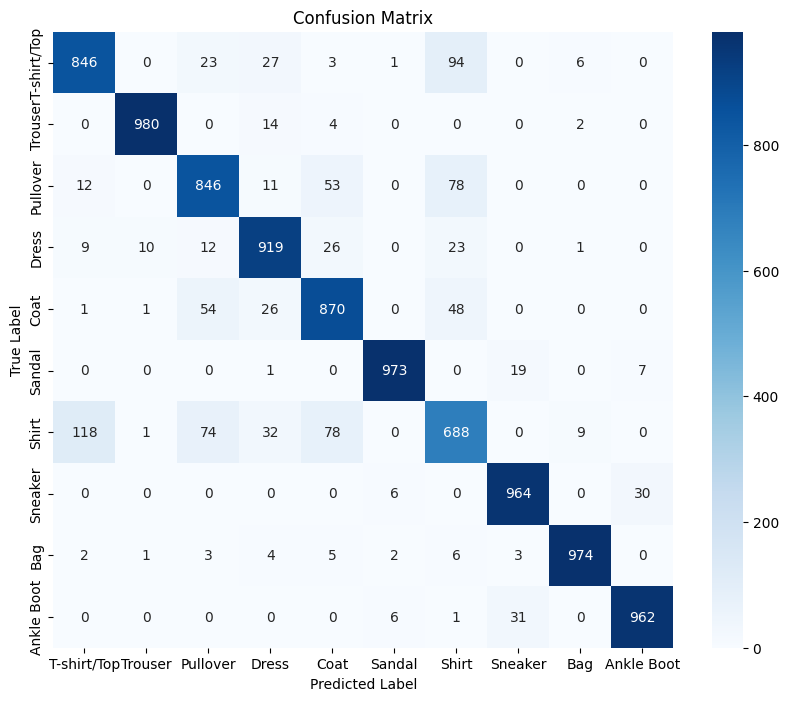

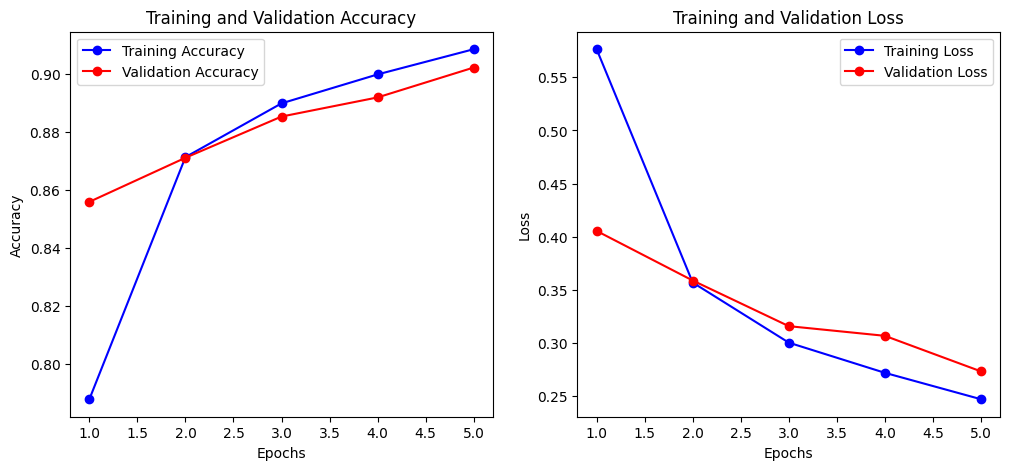

In [2]:
"""
Este código construye y entrena una red neuronal convolucional (CNN) para el dataset Fashion MNIST con Keras.
El modelo clasifica imágenes de artículos de moda en 10 categorías. Incluye métricas adicionales de rendimiento,
visualización de matriz de confusión y curvas de entrenamiento para facilitar el análisis del desempeño.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

# Construir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels_categorical, epochs=5, batch_size=64, validation_data=(test_images, test_labels_categorical))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print(f'Test accuracy: {test_acc}')

# Obtener predicciones en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generar reporte de clasificacion
print("Classification Report:", classification_report(test_labels, predicted_labels, target_names=[
    'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
]))

# Mostrar matriz de confusion
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
], yticklabels=[
    'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'
])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Graficar precision y perdida
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
